In [111]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [82]:
data_train = pd.read_csv("data/train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [83]:
data_train["Age"].mean()

29.69911764705882

## PreProcess

In [84]:
data_train = data_train.replace(["female", "male"], [0, 1])
data_train = data_train.replace(["S", "C", "Q"], [0, 1, 2])
data_train['Age'].fillna(29,inplace=True)
data_train['Embarked'].fillna(0,inplace=True)
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,1.0


In [85]:
X_train = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]])
Y_train = np.array(data_train[["Survived"]])

## Model

In [86]:
model = tf.keras.models.Sequential([
    Dense(6, activation="relu"),
    Dense(512 , activation='relu'),
    Dense(256 , activation='relu'),
    Dense(128 , activation='relu'),
    Dense(2, activation="softmax")
])

In [87]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             loss = tf.losses.sparse_categorical_crossentropy,
             metrics = ['accuracy'])

In [88]:
train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 2s 15ms/step - loss: 1.1193 - accuracy: 0.5892
Epoch 2/200
28/28 [==============================] - 0s 16ms/step - loss: 0.6405 - accuracy: 0.6409
Epoch 3/200
28/28 [==============================] - 0s 16ms/step - loss: 0.5681 - accuracy: 0.7363
Epoch 4/200
28/28 [==============================] - 0s 17ms/step - loss: 0.4850 - accuracy: 0.7924
Epoch 5/200
28/28 [==============================] - 0s 15ms/step - loss: 0.4915 - accuracy: 0.7868
Epoch 6/200
28/28 [==============================] - 0s 15ms/step - loss: 0.4479 - accuracy: 0.8193
Epoch 7/200
28/28 [==============================] - 0s 15ms/step - loss: 0.4712 - accuracy: 0.7946
Epoch 8/200
28/28 [==============================] - 0s 17ms/step - loss: 0.4544 - accuracy: 0.8249
Epoch 9/200
28/28 [==============================] - 0s 15ms/step - loss: 0.4490 - accuracy: 0.8058
Epoch 10/200
28/28 [==============================] - 0s 14ms/step - loss: 0.4952 - accuracy: 0.7800

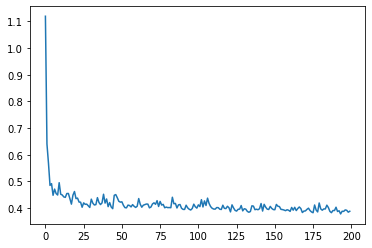

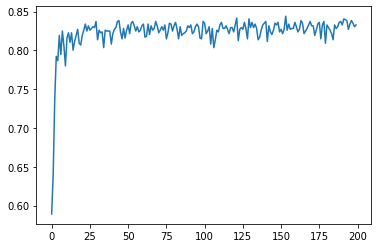

In [89]:
plt.plot(train_output.history["loss"])
plt.show()
plt.plot(train_output.history["accuracy"])
plt.show()

In [90]:
model.save("my_titanic.h5")

In [91]:
data_test = pd.read_csv("data/test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [92]:
data_test = data_test.replace(['female','male'],[0,1])
data_test = data_test.replace(['S','C','Q'],[0,1,2])
data_train['Age'].fillna(29,inplace=True)
data_train['Embarked'].fillna(0,inplace=True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [94]:
X_test = np.array(data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]])
Y_test = np.array(data_train[["Survived"]])

model.evaluate(X_test, Y_test)

28/28 [==============================] - 0s 7ms/step - loss: 0.3807 - accuracy: 0.8384


[0.38072147965431213, 0.8383838534355164]

## KNN

In [99]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, Y_train)

Y_pred = KNN_model.predict(X_test)

C:\Users\AmirHvB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [114]:
KNN_accuracy = accuracy_score(Y_test, Y_pred)
KNN_accuracy

0.8496071829405163

## Perceptron

In [135]:
perceptron = Perceptron(random_state=36)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)

C:\Users\AmirHvB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
percp_accuracy = accuracy_score(Y_test, Y_pred)
percp_accuracy

0.7025813692480359